In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ordenador\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [22]:
import os

path = r"C:\Users\Ordenador\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3"

os.listdir(path)


['amz_uk_price_prediction_dataset.csv']

In [24]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns

df = pd.read_csv(os.path.join(path, "amz_uk_price_prediction_dataset.csv"))

print(df.head(),df.info(), df.shape)

<class 'pandas.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               str    
 2   title              str    
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           str    
dtypes: bool(1), float64(2), int64(3), str(3)
memory usage: 151.5 MB
   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6  

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


C:\Users\Ordenador\AppData\Local\Temp\ipykernel_13380\1449879829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category",y="absolutfrequency",data=freq_table,palette="viridis", legend=True)


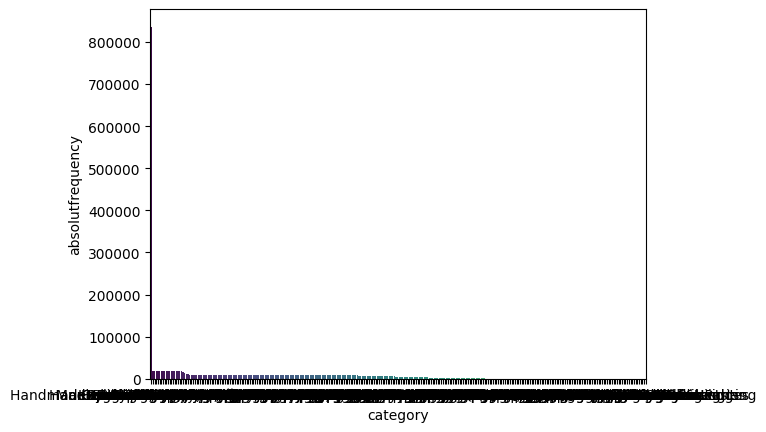

In [4]:
freq_table=df["category"].value_counts().reset_index()
freq_table.columns="category","absolutfrequency"
sns.barplot(x="category",y="absolutfrequency",data=freq_table,palette="viridis", legend=True)
plt.show()

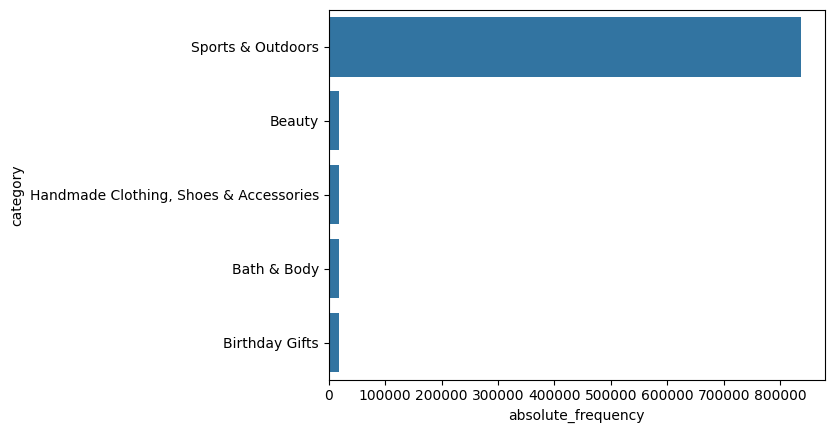

In [36]:

top5 = (
    df.groupby("category")
      .size()
      .sort_values(ascending=False)
      .head(5)
      .index
)

dftop5=df[df["category"].isin(top5)]

freq_top5 = (
    dftop5["category"]
    .value_counts()
    .reset_index()
)

freq_top5.columns = ["category", "absolute_frequency"]


sns.barplot(y="category",x="absolute_frequency",data=freq_top5)

plt.show()

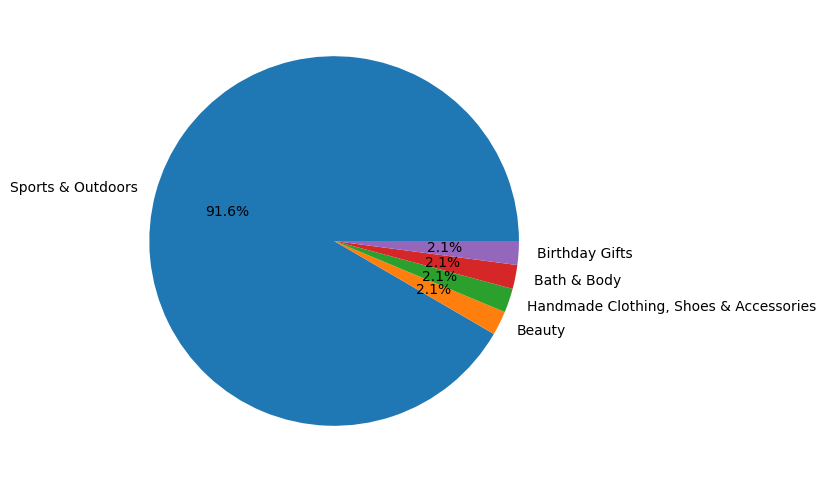

In [6]:
freq_top5.plot.pie(
    y="absolute_frequency",
    labels=freq_top5["category"],
    autopct="%1.1f%%",
    figsize=(6,6),
    legend=False
)
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [7]:

meandf=df["price"].mean().__round__(2)
mediandf=df["price"].median().__round__(2)
modedf=df["price"].mode().values
modedf=modedf[modedf!=0]
print(meandf,mediandf,modedf)

89.24 19.09 [9.99]


In [14]:
price=df["price"]

var=price.var().__round__(2)
std=price.std().__round__(2)
prange=price.max()-price.min()
pinterquartile=price.quantile(0.75)-price.quantile(0.25)

print(f"variance = {var}, standard deviation =  {std}, range = {prange}, interquartile = {pinterquartile}")

variance = 119445.49, standard deviation =  345.61, range = 100000.0, interquartile = 36.0


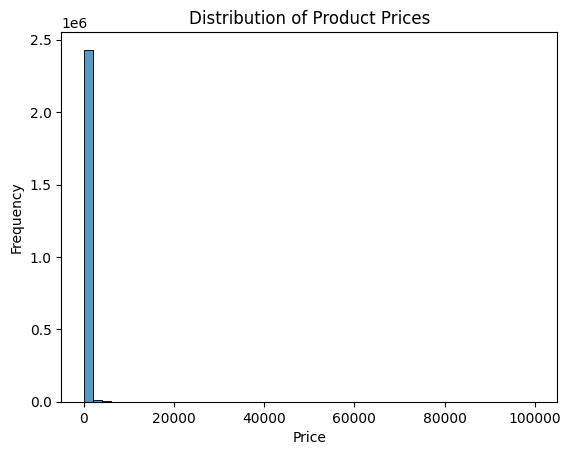

In [43]:
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

sns.histplot(df["price"], bins=50)
plt.show()


In [19]:
price_null=(df["price"]==0).sum()
print(price_null)

20


In [ ]:
bigprice = df[df["price"] > 50]
smallprice=df[df["price"]<=50]


565866
1877785


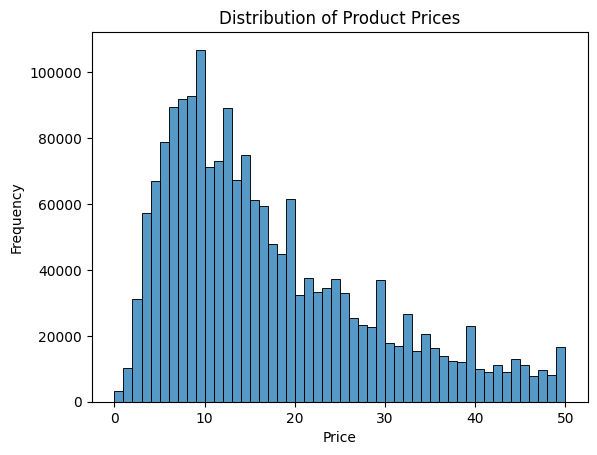

In [42]:


plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

sns.histplot(df[df["price"]<50]["price"], bins=50)
plt.show()


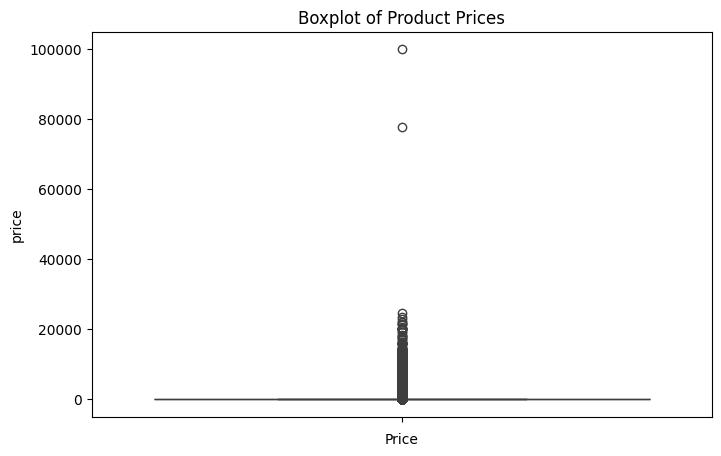

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df["price"])

plt.title("Boxplot of Product Prices")
plt.xlabel("Price")

plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

In [49]:

meandf=df["stars"].mean().__round__(2)
mediandf=df["stars"].median().__round__(2)
modedf=df["stars"].mode().values

print(meandf,mediandf,modedf)

2.15 0.0 [0.]


In [51]:
stars=df["stars"]

var=stars.var().__round__(2)
std=stars.std().__round__(2)
srange=stars.max()-price.min()
sinterquartile=stars.quantile(0.75)-stars.quantile(0.25)

print(var, std, srange,sinterquartile)

4.82 2.19 5.0 4.4


In [52]:
freq_stars = df["stars"].value_counts().reset_index()
freq_stars.columns = ["stars", "frequency"]

freq_stars = freq_stars.sort_values("stars")

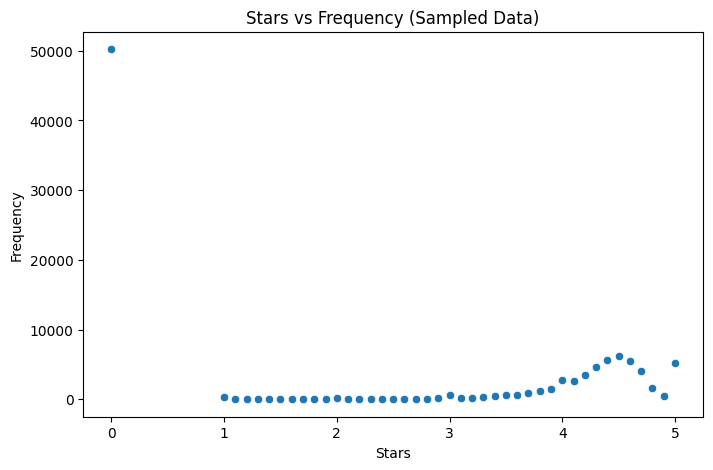

In [55]:
sample_df = df.sample(n=100_000, random_state=112)

freq_stars_sample = (
    sample_df["stars"]
    .value_counts()
    .reset_index()
)

freq_stars_sample.columns = ["stars", "frequency"]
freq_stars_sample = freq_stars_sample.sort_values("stars")

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=freq_stars_sample,
    x="stars",
    y="frequency"
)

plt.title("Stars vs Frequency (Sampled Data)")
plt.xlabel("Stars")
plt.ylabel("Frequency")

plt.show()

In [54]:
skewness = df["stars"].skew()
kurtosis = df["stars"].kurt()

print(skewness,kurtosis)

0.08120735761080881 -1.9260061280432994


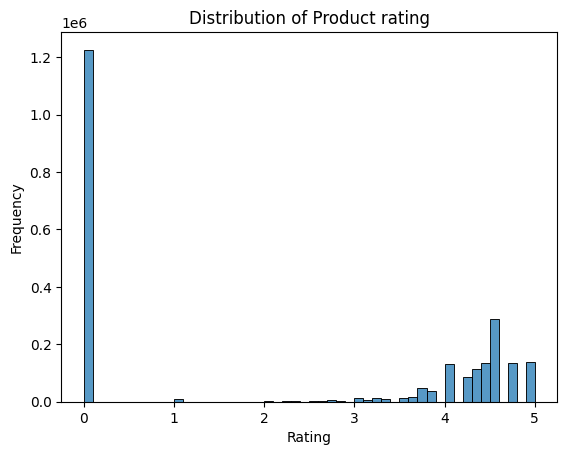

In [56]:
plt.title("Distribution of Product rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")

sns.histplot(df["stars"], bins=50)
plt.show()

In [65]:
(df["stars"] == 0).sum()==(df["reviews"] == 0).sum()




np.True_

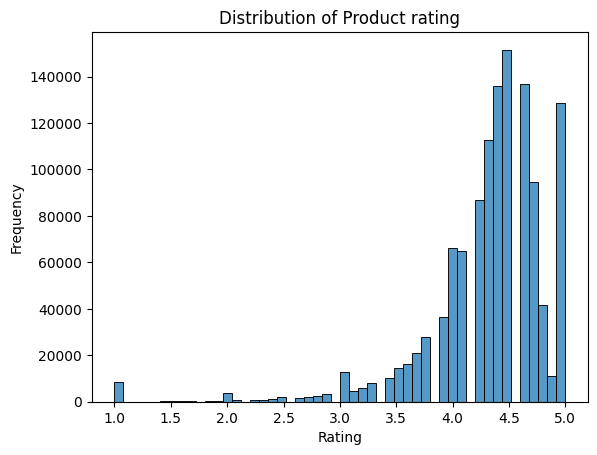

In [66]:
plt.title("Distribution of Product rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")

sns.histplot(df[df["stars"]!=0]["stars"], bins=50)
plt.show()